## Preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data.csv


In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
# application_df = pd.read_csv("../Resources/charity_data.csv")
application_df = pd.read_csv('charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(["EIN","NAME"],axis=1)
application_df.shape

(34299, 10)

In [ ]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_value = application_df.loc[:,'APPLICATION_TYPE'].value_counts(normalize= True)
application_value

T3     0.788274
T4     0.044958
T6     0.035453
T5     0.034199
T19    0.031050
T8     0.021488
T7     0.021138
T10    0.015394
T9     0.004548
T13    0.001924
T12    0.000787
T2     0.000466
T25    0.000087
T14    0.000087
T29    0.000058
T15    0.000058
T17    0.000029
Name: APPLICATION_TYPE, dtype: float64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = list(application_value[application_value<=0.031050].index)
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
#TRYING TO GET 90% OF DATA USING NORMALIZE =TRUE
#  YOUR CODE GOES HERE
classification_value = application_df.loc[:,'CLASSIFICATION'].value_counts(normalize = False)
classification_value

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C5200        1
C1236        1
C1370        1
C6100        1
C1570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
classification_types_to_replace = list(classification_value[classification_value < 1883].index)
classification_types_to_replace

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1278',
 'C1238',
 'C1237',
 'C1235',
 'C7210',
 'C1720',
 'C4100',
 'C2400',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C1234',
 'C1267',
 'C1246',
 'C3200',
 'C1256',
 'C4200',
 'C1820',
 'C4120',
 'C2190',
 'C1732',
 'C2380',
 'C1580',
 'C2561',
 'C1900',
 'C2150',
 'C2500',
 'C4500',
 'C2170',
 'C8210',
 'C3700',
 'C1283',
 'C1248',
 'C2600',
 'C1728',
 'C1245',
 'C2570',
 'C5200',
 'C1236',
 'C1370',
 'C6100',
 'C1570']

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
#TRYING TO ELIMINATE OUTLIERS BY GETTING 90% OF DATA

# Replace in dataframe
for cls in classification_types_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [ ]:
x_APP = application_df.drop('IS_SUCCESSFUL', axis=1)
X = pd.get_dummies(x_APP)
X.shape

(34299, 40)

In [ ]:
X.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
y = application_df.IS_SUCCESSFUL.values
y.shape

(34299,)

In [ ]:
application_df.IS_SUCCESSFUL.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [ ]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
#FIRST MODEL HAS GOT TRAIN_DATA ACCURACY = 0.729, TEST_DATA ACCURACY = 0.734 ITS A UNDERFIT

# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=50, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=50, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=60)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# First hidden layer
#  YOUR CODE GOES HERE

# Second hidden layer
#  YOUR CODE GOES HERE

# Output layer
#  YOUR CODE GOES HERE

# Check the structure of the model
nn_model.summary()

Epoch 1/60
804/804 [==============================] - 2s 2ms/step - loss: 0.5780 - accuracy: 0.7178
Epoch 2/60
804/804 [==============================] - 1s 2ms/step - loss: 0.5617 - accuracy: 0.7272
Epoch 3/60
804/804 [==============================] - 1s 2ms/step - loss: 0.5570 - accuracy: 0.7299
Epoch 4/60
804/804 [==============================] - 1s 2ms/step - loss: 0.5555 - accuracy: 0.7292
Epoch 5/60
804/804 [==============================] - 1s 2ms/step - loss: 0.5545 - accuracy: 0.7299
Epoch 6/60
804/804 [==============================] - 1s 2ms/step - loss: 0.5530 - accuracy: 0.7311
Epoch 7/60
804/804 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7317
Epoch 8/60
804/804 [==============================] - 1s 2ms/step - loss: 0.5523 - accuracy: 0.7316
Epoch 9/60
804/804 [==============================] - 1s 2ms/step - loss: 0.5511 - accuracy: 0.7320
Epoch 10/60
804/804 [==============================] - 1s 2ms/step - loss: 0.5505 - accuracy: 0.7325

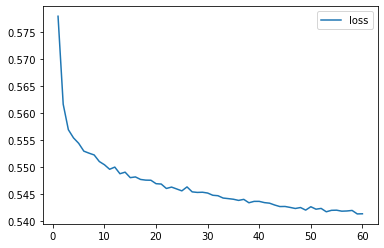

In [ ]:
# Create a DataFrame containing training history
application_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
application_df.index += 1

# Plot the loss
application_df.plot(y="loss")

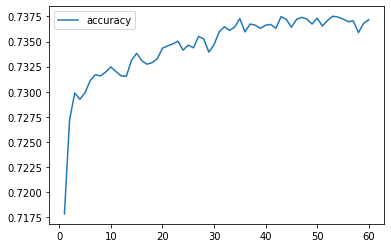

In [ ]:
# Plot the accuracy
application_df.plot(y="accuracy")

In [ ]:
# Train the model
#  YOUR CODE GOES HERE

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5591 - accuracy: 0.7301
Loss: 0.5590540766716003, Accuracy: 0.7301457524299622


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
#MY SECOND MODEL HAS TRAIN DATA ACCURACY IS 0.7388 AND TEST DATA ACCURACY IS 0.7301 ITS A GOOD FIT


# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=100, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=100, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy" ])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=75)





# Check the structure of the model
nn_model.summary()

Epoch 1/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5746 - accuracy: 0.7176
Epoch 2/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5598 - accuracy: 0.7265
Epoch 3/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5571 - accuracy: 0.7298
Epoch 4/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5542 - accuracy: 0.7293
Epoch 5/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5526 - accuracy: 0.7310
Epoch 6/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5516 - accuracy: 0.7312
Epoch 7/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5514 - accuracy: 0.7319
Epoch 8/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5504 - accuracy: 0.7323
Epoch 9/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.7325
Epoch 10/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7327

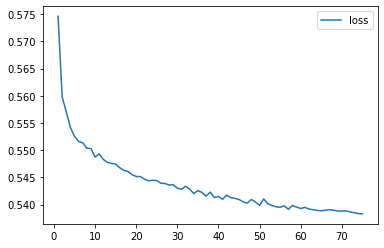

In [ ]:
# Create a DataFrame containing training history
application_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
application_df.index += 1

# Plot the loss
application_df.plot(y="loss")

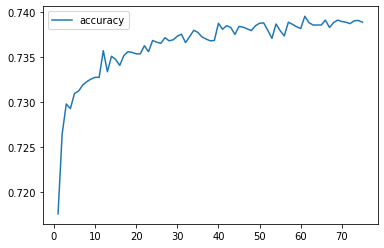

In [ ]:
# Plot the accuracy
application_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5702 - accuracy: 0.7301
Loss: 0.5701692700386047, Accuracy: 0.7301457524299622


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
#MY THIRD MODEL HAS ACTIVATION CHANGED INTO tanh SO I GOT TRAIN DATA AS ACCURACY 0.7393 AND TEST DATA AS ACCURACY 0.7309 SO ITS A BESTFIT


# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=100, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=100, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy" ])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=75)





# Check the structure of the model
nn_model.summary()


Epoch 1/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5775 - accuracy: 0.7187
Epoch 2/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5619 - accuracy: 0.7277
Epoch 3/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5590 - accuracy: 0.7290
Epoch 4/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5563 - accuracy: 0.7292
Epoch 5/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5554 - accuracy: 0.7290
Epoch 6/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5544 - accuracy: 0.7295
Epoch 7/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5522 - accuracy: 0.7289
Epoch 8/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5521 - accuracy: 0.7311
Epoch 9/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5508 - accuracy: 0.7292
Epoch 10/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.7295

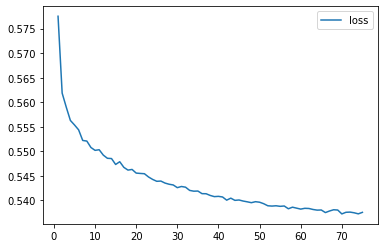

In [ ]:
 #Create a DataFrame containing training history
application_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
application_df.index += 1

# Plot the loss
application_df.plot(y="loss")

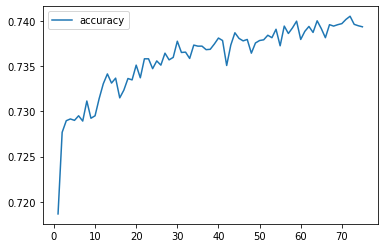

In [ ]:
# Plot the accuracy
application_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5614 - accuracy: 0.7310
Loss: 0.5614081025123596, Accuracy: 0.7309620976448059


In [ ]:
#IN DATA PREPROCESSING I WAS ABLE TO ELIMINATE OUTLIERS AND WORK ON 90% OF DATA
#MODEL 1 IS UNDERFIT IT HAS LOW BIAS TO TRAINING DATA AND LOW VARIANCE TO TEST DATA
#MODEL 2 AND MY MODEL 3 WITH MODIFICATION OF ACTIVATION = tanh GIVES A GOOD FIT 

In [ ]:
# Export our model to HDF5 file
from google.colab import files

nn_model.save('/content/Alphabet_Soup_model3.h5')
files.download('/content/Alphabet_Soup_model3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>